Magical function `%%time` can be use to run the case. Serial computation is carried by running, from `case_dir` with command `SU2_CFD` followed by configuration file, here standardized to be `config.cfg`.

In [22]:
%%time
su.SU2ConfigField.case.run_command(case_dir, "SU2_CFD config.cfg")

CPU times: user 3.72 ms, sys: 9.02 ms, total: 12.7 ms
Wall time: 2min 47s


Running in parallel can be achieved by prepending the command by `mpirun -np <cores>`, where `<cores>` represents the number of cores to run the simulation. You can also replace `-np <cores>` by `--use-hwthread-cpus` to make use of all available threads. It is also possible to use SU2 scripts to manage running in parallel, what can be achieved through `python3 -m parallel_computation -f config.cfg -n 2 -c COMPUTE`.

In [23]:
# %%time
# su.SU2ConfigField.case.run_command(case_dir, "mpirun -np 2 SU2_CFD config.cfg")

## Post-processing

Default output volumetric mesh is `vol_solution.vtu`, which is to be found under `case_dir`.

In [24]:
file_name = f"{case_dir}/vol_solution.vtu"
file_name

'cases/su2-01-compressible-inviscid-bump/vol_solution.vtu'

We can use standard system tools such as `head` and `grep` to identify the names of fields in this file. These fields are the ones you find in the dropdown menu when using `paraview` for data exploration.

In [25]:
!head -20 cases/su2-01-compressible-inviscid-bump/vol_solution.vtu \
| grep 'DataArray type="Float32" Name='

<DataArray type="Float32" Name="" NumberOfComponents= "3" offset="0" format="appended"/>
<DataArray type="Float32" Name="Density" NumberOfComponents= "1" offset="1073333" format="appended"/>
<DataArray type="Float32" Name="Momentum" NumberOfComponents= "3" offset="1204413" format="appended"/>
<DataArray type="Float32" Name="Energy" NumberOfComponents= "1" offset="1597637" format="appended"/>
<DataArray type="Float32" Name="Pressure" NumberOfComponents= "1" offset="1728717" format="appended"/>
<DataArray type="Float32" Name="Temperature" NumberOfComponents= "1" offset="1859797" format="appended"/>
<DataArray type="Float32" Name="Mach" NumberOfComponents= "1" offset="1990877" format="appended"/>
<DataArray type="Float32" Name="Pressure_Coefficient" NumberOfComponents= "1" offset="2121957" format="appended"/>


Finally we read this file and display the quantities of interest.

In [26]:
grid = pv.read(file_name)

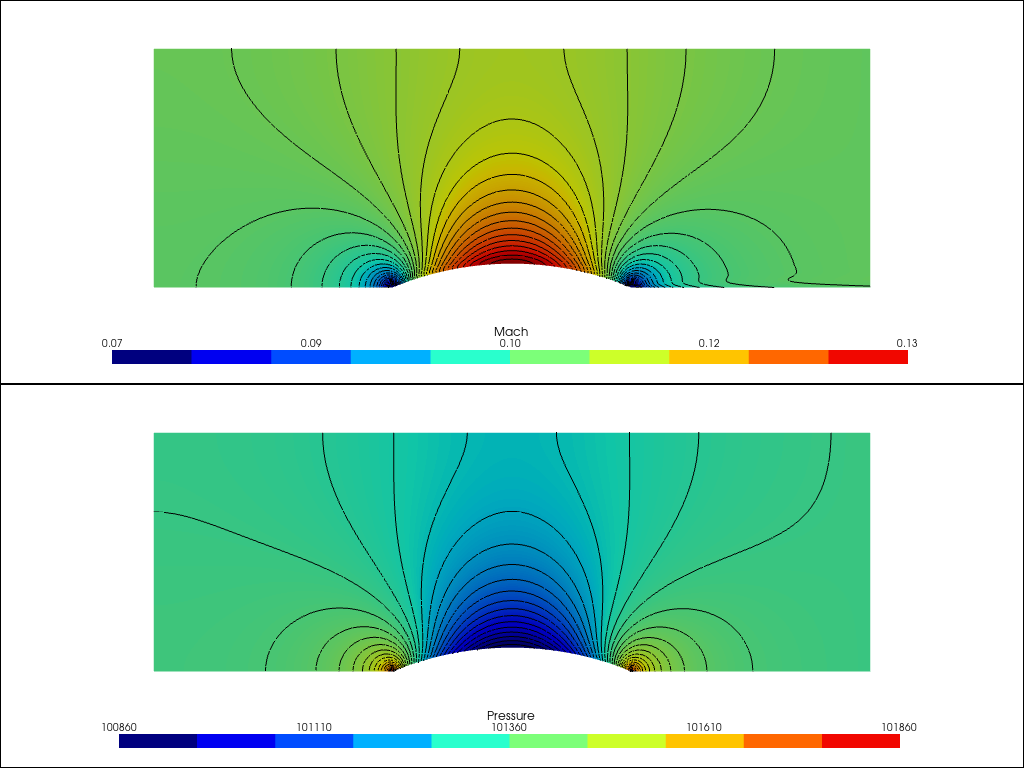

In [ ]:
cpos = ((1.5, 0.4, 3.0),
        (1.5, 0.4, 0.0),
        (0.0, 0.0, 0.0))

opts = dict(
    cmap="jet",
    pbr=False,
    scalar_bar_args=dict(
        height=0.1,
        width=0.8,
        vertical=False,
        position_x=0.1,
        position_y=0.05,
        color="k",
        n_colors=10
    )
)

p = pv.Plotter(shape="1/1", notebook=True)
p.set_background(color="w")

lims = (100860, 101860)
opts["scalar_bar_args"]["fmt"] = "%.0f"
contour = grid.contour(40, scalars="Pressure", rng=lims)

p.subplot(0)
p.add_mesh(grid.copy(), **opts, scalars="Pressure", clim=lims)
p.add_mesh(contour, color="k", line_width=1)

lims = (0.07, 0.13)
opts["scalar_bar_args"]["fmt"] = "%.2f"
contour = grid.contour(40, scalars="Mach", rng=lims)

p.subplot(1)
p.add_mesh(grid.copy(), **opts, scalars="Mach", clim=lims)
p.add_mesh(contour, color="k", line_width=1)

p.link_views()
p.show(cpos=cpos)